In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the requests library. #6.2.6 no instructions just command. copied from 6.2.3
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call. #6.2.6 no instruction just command. copied from 6.2.3
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

651

In [117]:
#delete
cities = requests.get(city_url)
cities

<Response [200]>

In [118]:
#delete
#city_data = requests.get(city_url)
#city_data

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

### Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

###    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 14 | balkanabat
Processing Record 2 of Set 14 | albany
Processing Record 3 of Set 14 | constitucion
Processing Record 4 of Set 14 | hermanus
Processing Record 5 of Set 14 | port hardy
Processing Record 6 of Set 14 | mataura
Processing Record 7 of Set 14 | bredasdorp
Processing Record 8 of Set 14 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 14 | mayo
Processing Record 10 of Set 14 | castro
Processing Record 11 of Set 14 | punta arenas
Processing Record 12 of Set 14 | ayios loukas
City not found. Skipping...
Processing Record 13 of Set 14 | amapa
Processing Record 14 of Set 14 | baneh
Processing Record 15 of Set 14 | katherine
Processing Record 16 of Set 14 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 14 | mangan
Processing Record 18 of Set 14 | port alfred
Processing Record 19 of Set 14 | puerto ayora
Processing Record 20 of Set 14 | cabo rojo
Processing Reco

Processing Record 35 of Set 17 | klaksvik
Processing Record 36 of Set 17 | yabelo
Processing Record 37 of Set 17 | road town
Processing Record 38 of Set 17 | aksu
Processing Record 39 of Set 17 | gamba
Processing Record 40 of Set 17 | champoton
Processing Record 41 of Set 17 | linares
Processing Record 42 of Set 17 | andenes
Processing Record 43 of Set 17 | gold coast
Processing Record 44 of Set 17 | tongzi
Processing Record 45 of Set 17 | buala
Processing Record 46 of Set 17 | kushiro
Processing Record 47 of Set 17 | aklavik
Processing Record 48 of Set 17 | mirnyy
Processing Record 49 of Set 17 | yialos
City not found. Skipping...
Processing Record 50 of Set 17 | sisimiut
Processing Record 1 of Set 18 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 18 | alvdal
Processing Record 3 of Set 18 | kununurra
Processing Record 4 of Set 18 | itoman
Processing Record 5 of Set 18 | nome
Processing Record 6 of Set 18 | camacha
Processing Record 7 of Set 18 | wexford
Processing R

Processing Record 21 of Set 21 | hofn
Processing Record 22 of Set 21 | havre-saint-pierre
Processing Record 23 of Set 21 | mapiripan
Processing Record 24 of Set 21 | santo augusto
Processing Record 25 of Set 21 | quatre cocos
Processing Record 26 of Set 21 | fairbanks
Processing Record 27 of Set 21 | sinnamary
Processing Record 28 of Set 21 | talnakh
Processing Record 29 of Set 21 | buraydah
Processing Record 30 of Set 21 | abu kamal
Processing Record 31 of Set 21 | santa eulalia del rio
City not found. Skipping...
Processing Record 32 of Set 21 | guerrero negro
Processing Record 33 of Set 21 | deputatskiy
Processing Record 34 of Set 21 | san felipe
Processing Record 35 of Set 21 | zolotinka
City not found. Skipping...
Processing Record 36 of Set 21 | umzimvubu
City not found. Skipping...
Processing Record 37 of Set 21 | walvis bay
Processing Record 38 of Set 21 | faya
Processing Record 39 of Set 21 | newport
Processing Record 40 of Set 21 | minglanilla
Processing Record 41 of Set 21 |

Processing Record 1 of Set 25 | san pedro
Processing Record 2 of Set 25 | pilikwe
Processing Record 3 of Set 25 | aljezur
Processing Record 4 of Set 25 | verkhnyaya inta
Processing Record 5 of Set 25 | ewa beach
Processing Record 6 of Set 25 | mehamn
Processing Record 7 of Set 25 | puerto baquerizo moreno
Processing Record 8 of Set 25 | terrace
Processing Record 9 of Set 25 | san carlos
Processing Record 10 of Set 25 | ostrovnoy
Processing Record 11 of Set 25 | bagdarin
Processing Record 12 of Set 25 | buchanan
Processing Record 13 of Set 25 | kavieng
Processing Record 14 of Set 25 | henties bay
Processing Record 15 of Set 25 | sorkjosen
Processing Record 16 of Set 25 | port-gentil
Processing Record 17 of Set 25 | dawson creek
Processing Record 18 of Set 25 | xichang
Processing Record 19 of Set 25 | elbistan
Processing Record 20 of Set 25 | tual
Processing Record 21 of Set 25 | madang
Processing Record 22 of Set 25 | khatra
Processing Record 23 of Set 25 | borogontsy
Processing Record 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Balkanabat,39.5108,54.3671,42.30,44,17,2.62,TM,2021-12-27 23:38:26
1,Albany,42.6001,-73.9662,32.09,78,100,4.38,US,2021-12-27 23:36:00
2,Constitucion,-35.3333,-72.4167,60.08,85,89,3.09,CL,2021-12-27 23:38:27
3,Hermanus,-34.4187,19.2345,63.90,82,41,11.54,ZA,2021-12-27 23:38:27
4,Port Hardy,50.6996,-127.4199,24.76,86,75,13.80,CA,2021-12-27 23:38:27
5,Mataura,-46.1927,168.8643,57.47,40,98,6.53,NZ,2021-12-27 23:38:28
6,Bredasdorp,-34.5322,20.0403,60.12,82,39,4.61,ZA,2021-12-27 23:34:13
7,Mayo,38.8876,-76.5119,43.14,83,90,4.61,US,2021-12-27 23:38:29
8,Castro,-24.7911,-50.0119,65.41,68,38,4.63,BR,2021-12-27 23:38:02
9,Punta Arenas,-53.1500,-70.9167,53.11,46,8,25.97,CL,2021-12-27 23:33:51


In [14]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city_data_df the new column order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Balkanabat,TM,2021-12-27 23:38:26,39.5108,54.3671,42.30,44,17,2.62
1,Albany,US,2021-12-27 23:36:00,42.6001,-73.9662,32.09,78,100,4.38
2,Constitucion,CL,2021-12-27 23:38:27,-35.3333,-72.4167,60.08,85,89,3.09
3,Hermanus,ZA,2021-12-27 23:38:27,-34.4187,19.2345,63.90,82,41,11.54
4,Port Hardy,CA,2021-12-27 23:38:27,50.6996,-127.4199,24.76,86,75,13.80
...,...,...,...,...,...,...,...,...,...
590,Manono,CD,2021-12-28 00:40:00,-7.3000,27.4167,66.02,94,100,0.81
591,Krasnyy Chikoy,RU,2021-12-28 00:40:00,50.3643,108.7512,-4.54,98,100,3.51
592,Antofagasta,CL,2021-12-28 00:40:00,-23.6500,-70.4000,66.43,83,19,5.59
593,Khandyga,RU,2021-12-28 00:40:01,62.6667,135.6000,-58.11,100,62,1.32


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

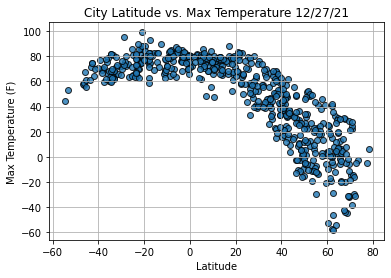

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

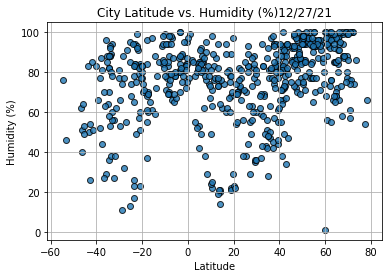

In [21]:
# Build the scatter plots for latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

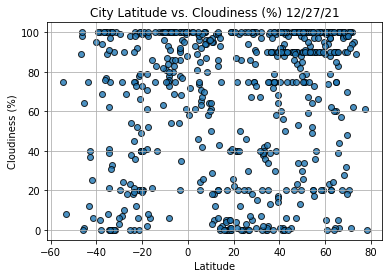

In [22]:
# Build the scatter plots for latitude vs cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

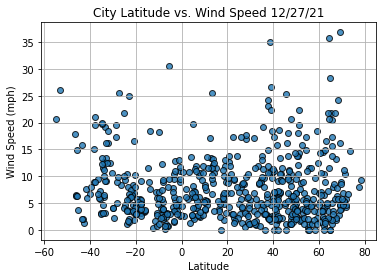

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()